House Price Prediction is an important aspect of real estate applications. House price is dependent on several variables like number of rooms, locality, etc.<br>
In this use case, you need to predict the value of prices of houses in Boston, using the given set of features (independent) variables, using Multiple Linear Regression OLS method<br>
You will be using the dataset **Boston_prices.csv** in this exercise. The dataset contains information about different houses in Boston.<br>
The prices of the houses are available under the variable MEDV which is the target variable, and all the other variables are the feature variables.<br>

Reference:
https://www.kaggle.com/c/boston-housing<br>

Data Dictionary:<br>

CRIM: Per capita crime rate by town<br>

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft<br>

INDUS: Proportion of non-retail business acres per town<br>

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br>

NOX: Nitric oxide concentration (parts per 10 million)<br>

RM: Average number of rooms per dwelling<br>

AGE: Proportion of owner-occupied units built prior to 1940<br>

DIS: Weighted distances to five Boston employment centers<br>

RAD: Index of accessibility to radial highways<br>

TAX: Full-value property tax rate per 10,000<br>

PTRATIO: Pupil-teacher ratio by town<br>

BLACK: 1000(Bk — 0.63) ², where Bk is the proportion of[people of African American descent] by town<br>

LSTAT: Percentage of lower status of the population<br>

MEDV: Median value of owner-occupied homes in 1000s<br>

In [1]:
# Import packages
import pandas as pd
import numpy as np
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
# Import dataset with variables for house prices
boston_df = pd.read_csv('Boston_prices.csv')

In [3]:
# View few rows of the dataframe
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### medv is the dependent variable house price. All other variables are feature variables or independent variables

In [4]:
# View shape of dataset
print(boston_df.shape)

(506, 14)


#### There are 506 records and 14 variables in the dataframe

## Univariate Analysis

In [5]:
# Summary of crim variable
boston_df['crim'].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677082
max       88.976200
Name: crim, dtype: float64

In [6]:
# Summary of zn variable
boston_df['zn'].describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: zn, dtype: float64

In [7]:
# Summary of indus variable
boston_df['indus'].describe()

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: indus, dtype: float64

In [8]:
# Summary of chas variable
boston_df['chas'].describe()

count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: chas, dtype: float64

In [9]:
# Summary of nox variable
boston_df['nox'].describe()

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: nox, dtype: float64

In [10]:
# Summary of rm variable
boston_df['rm'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: rm, dtype: float64

In [11]:
# Summary of age variable
boston_df['age'].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: age, dtype: float64

In [12]:
# Summary of age variable
boston_df['dis'].describe()

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: dis, dtype: float64

In [13]:
# Summary of dis variable
boston_df['dis'].describe()

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: dis, dtype: float64

In [14]:
# Summary of rad variable
boston_df['rad'].describe()

count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: rad, dtype: float64

In [15]:
# Summary of tax variable
boston_df['tax'].describe()

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: tax, dtype: float64

In [16]:
# Summary of ptratio variable
boston_df['ptratio'].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64

In [17]:
# Summary of black variable
boston_df['black'].describe()

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: black, dtype: float64

In [18]:
# Summary of lstat variable
boston_df['lstat'].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: lstat, dtype: float64

In [19]:
# Summary of medv variable
boston_df['medv'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

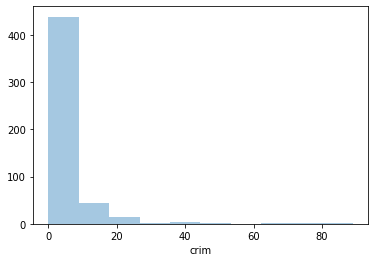

In [20]:
# Histogram for crim
sns.distplot(boston_df['crim'],bins=10,kde=False);

#### Per capita crime rate by town(crim) is mostly between 0 to 10

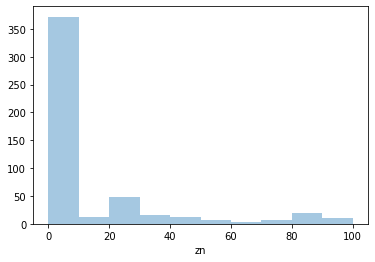

In [21]:
# Histogram for zn
sns.distplot(boston_df['zn'],bins=10,kde=False);

#### Proportion of residential land zoned for lots over 25,000 sq. ft(zn) is mostly between the range of 0 to 10

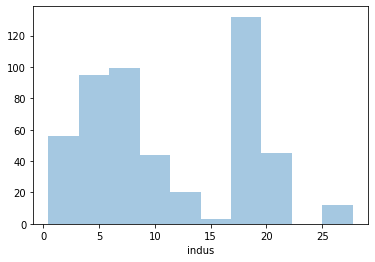

In [22]:
# Histogram for indus
sns.distplot(boston_df['indus'],bins=10,kde=False);

#### Proportion of non-retail business acres per town(indus) is mostly between the range of 2 to 14

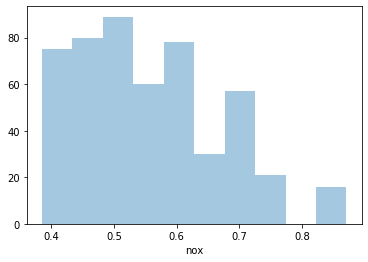

In [23]:
# Histogram for nox
sns.distplot(boston_df['nox'],bins=10,kde=False);

#### The range of Nitric oxide concentration(nox) is mostly between 0.3 to 0.75

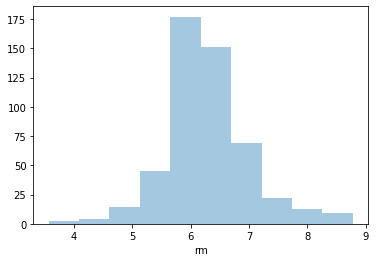

In [24]:
# Histogram for rm
sns.distplot(boston_df['rm'],bins=10,kde=False);

#### The range of Average number of rooms per dwelling(rm) is 5 to 8

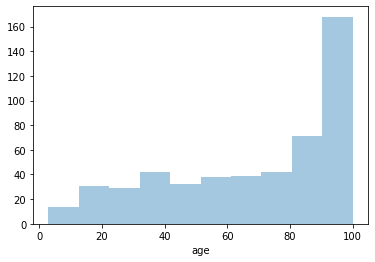

In [25]:
# Histogram for age
sns.distplot(boston_df['age'],bins=10,kde=False);

#### The Proportion of owner-occupied units built prior to 1940(age) is mostly between 80 to 100

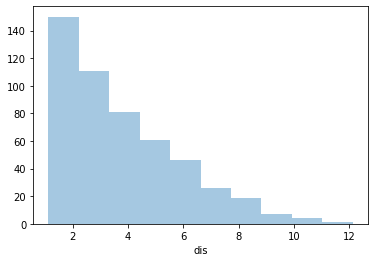

In [26]:
# Histogram for dis
sns.distplot(boston_df['dis'],bins=10,kde=False);

#### The range of Weighted distances to five Boston employment centers(dis) is between 2 to 6

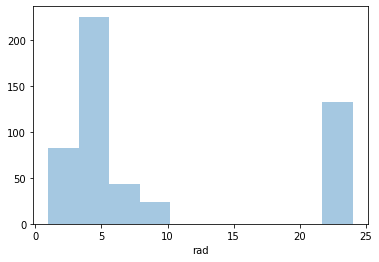

In [27]:
# Histogram for rad
sns.distplot(boston_df['rad'],bins=10,kde=False);

#### The Index of accessibility to radial highways(rad) is mostly between 1 to 10

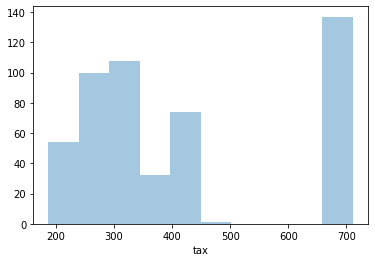

In [28]:
# Histogram for tax
sns.distplot(boston_df['tax'],bins=10,kde=False);

#### The Full-value property tax rate per $10,000(tax) is between the range of 200 to 450

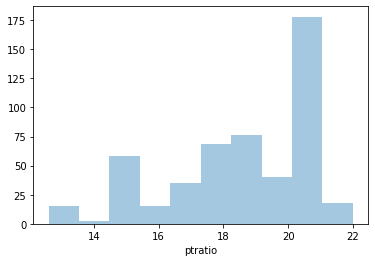

In [29]:
# Histogram for ptratio
sns.distplot(boston_df['ptratio'],bins=10,kde=False);

#### The Pupil-teacher ratio by town(ptratio) is mostly between 17 to 21

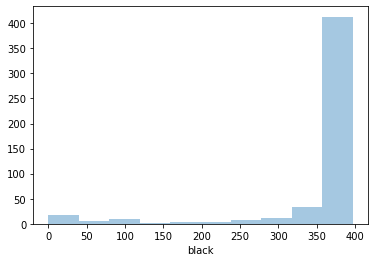

In [30]:
# Histogram for black
sns.distplot(boston_df['black'],bins=10,kde=False);

#### The proportion of [people of African American descent] by town(black) is mostly between 320 to 390

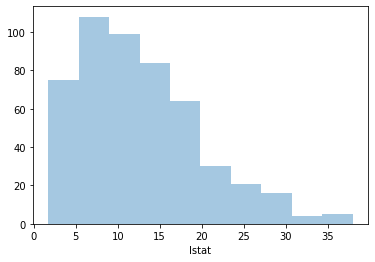

In [31]:
# Histogram for lstat 
sns.distplot(boston_df['lstat'],bins=10,kde=False);

#### The Percentage of lower status of the population(lstat) is mostly in the range of 6 to 19 percent

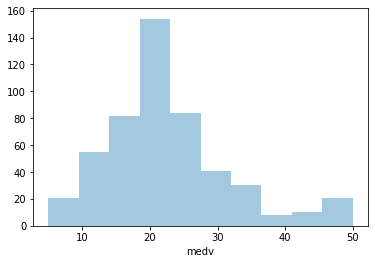

In [32]:
# Histogram for medv 
sns.distplot(boston_df['medv'],bins=10,kde=False);

#### The Median value of owner-occupied homes in $1000s(medv) is mostly between 10 to 32

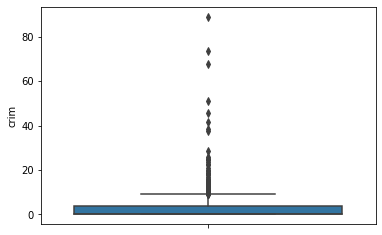

In [33]:
# Boxplot for crim
sns.boxplot(y = boston_df['crim']);

#### The median Per capita crime rate by town(crim) is almost 0

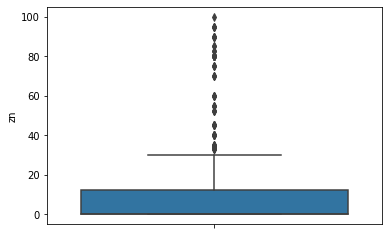

In [34]:
# Boxplot for zn
sns.boxplot(y = boston_df['zn']);

#### The median Proportion of residential land zoned for lots over 25,000 sq. ft(zn) is almost 0

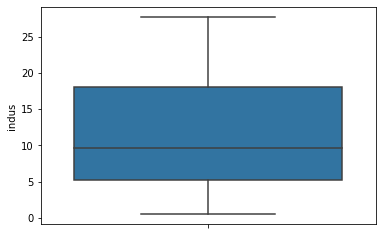

In [35]:
# Boxplot for indus
sns.boxplot(y = boston_df['indus']);

#### The median of Proportion of non-retail business acres per town(indus) is 10 and the proportion is right skewed.

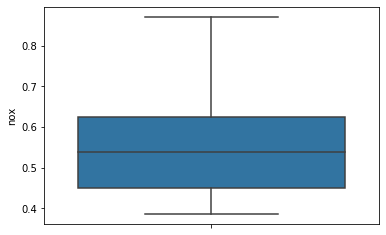

In [36]:
# Boxplot for nox
sns.boxplot(y = boston_df['nox']);

#### The median of Nitric oxide concentration(nox) is 0.55 and there is no skewness(normally distributed)

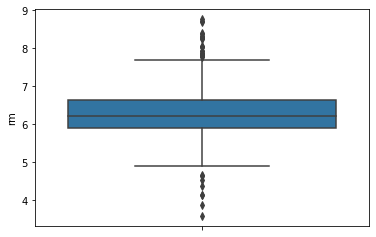

In [37]:
# Boxplot for rm
sns.boxplot(y = boston_df['rm']);

#### The median of Average number of rooms per dwelling(rm) is 6.2

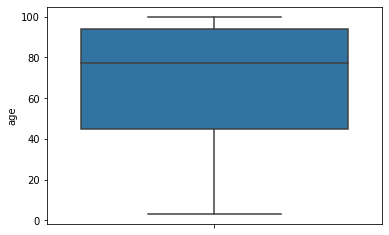

In [38]:
# Boxplot for age
sns.boxplot(y = boston_df['age']);

#### The median of Proportion of owner-occupied units built prior to 1940(age) is 79 and the age is left skewed

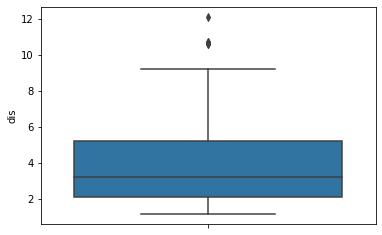

In [39]:
# Boxplot for dis
sns.boxplot(y = boston_df['dis']);

#### The median of Weighted distances to five Boston employment centers(dis) is 3

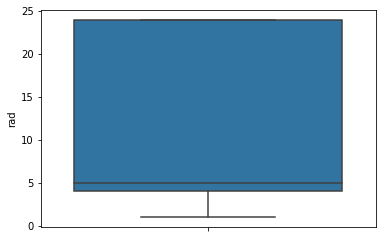

In [40]:
# Boxplot for rad
sns.boxplot(y = boston_df['rad']);

#### The median Index of accessibility to radial highways(rad) is mostly between 5 and rad is right skewed

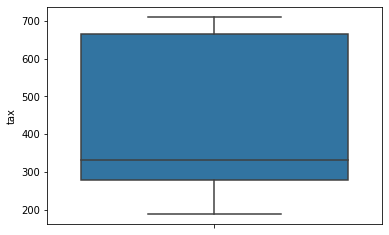

In [41]:
# Boxplot for tax
sns.boxplot(y = boston_df['tax']);

#### The median of Full-value property tax rate per $10,000(tax) is 330 and tax is right skewed

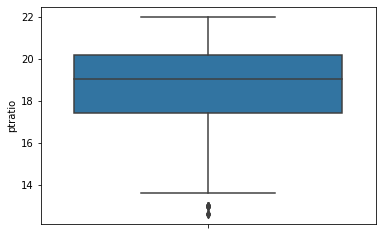

In [42]:
# Boxplot for ptratio
sns.boxplot(y = boston_df['ptratio']);

#### The median Percentage of lower status of the population(ptratio) is 19 and ptratio is left skewed

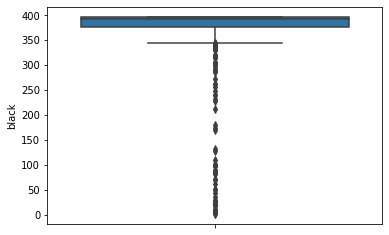

In [43]:
# Boxplot for ptratio
sns.boxplot(y = boston_df['black']);

#### The median proportion of [people of African American descent] by town is 390 

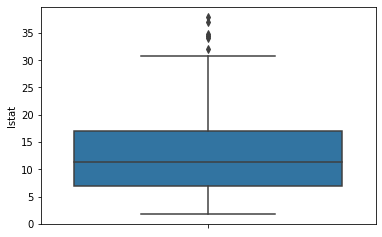

In [44]:
# Boxplot for lstat
sns.boxplot(y = boston_df['lstat']);

#### The median Percentage of lower status of the population(lstat) is 11

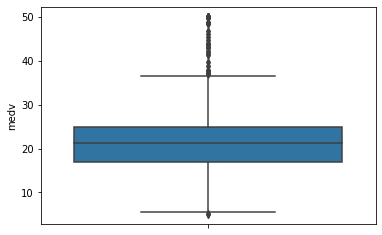

In [45]:
# Boxplot for medv
sns.boxplot(y = boston_df['medv']);

#### The Median value of owner-occupied homes in $1000s(medv) is 21

In [46]:
# Number of value in chas variable
boston_df['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

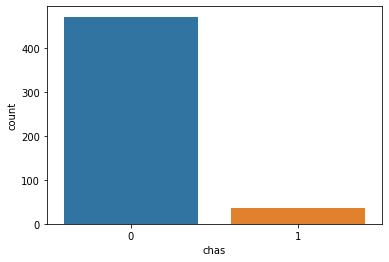

In [47]:
# Countplot for chas variable
sns.countplot(x=boston_df['chas'])

#### In Charles River dummy variable(chas), the tract bounds river are lesser

## Bivariate Analysis

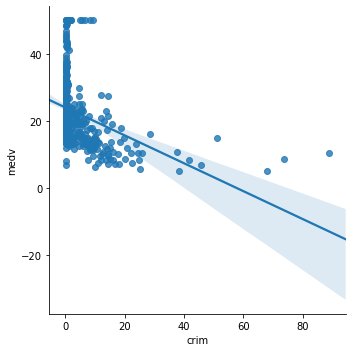

In [48]:
# lmplot of crim vs medv
sns.lmplot(x = 'crim',
           y = 'medv',
           data = boston_df) 

#### As the Per capita crime rate by town(crim) decreases, the Median value of owner-occupied homes in $1000s(medv) also decreases

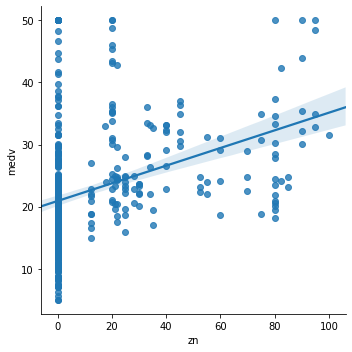

In [49]:
# lmplot of zn vs medv
sns.lmplot(x = 'zn',
           y = 'medv',
           data = boston_df) 

#### As the Proportion of residential land zoned for lots over 25,000 sq. ft(zn) increases, the Median value of owner-occupied homes in $1000s(medv) also increases

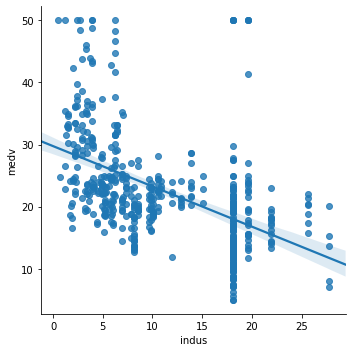

In [50]:
# lmplot of indus vs medv
sns.lmplot(x = 'indus',
           y = 'medv',
           data = boston_df) 

#### As the Proportion of non-retail business acres per town(indus) decreases, the Median value of owner-occupied homes in $1000s(medv) also decreases

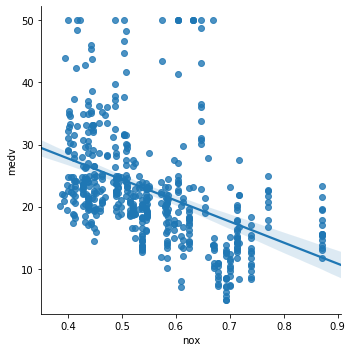

In [51]:
# lmplot of nox vs medv
sns.lmplot(x = 'nox',
           y = 'medv',
           data = boston_df) 

#### As the Nitric oxide concentration (parts per 10 million)(nox) increases, the Median value of owner-occupied homes in $1000s(medv) also decreases

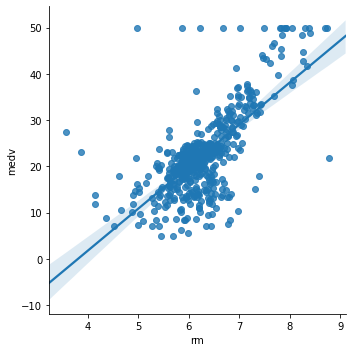

In [52]:
# lmplot of rm vs medv
sns.lmplot(x = 'rm',
           y = 'medv',
           data = boston_df) 

#### As the Average number of rooms per dwelling(rm) increases, the Median value of owner-occupied homes in $1000s(medv) also increases

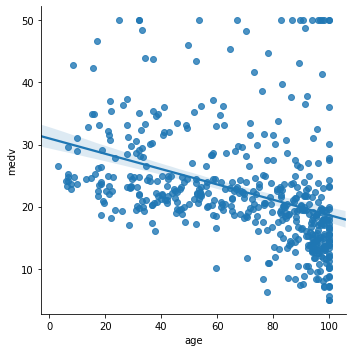

In [53]:
# lmplot of age vs medv
sns.lmplot(x = 'age',
           y = 'medv',
           data = boston_df) 

#### As the Proportion of owner-occupied units built prior to 1940(age) increases, the Median value of owner-occupied homes in $1000s(medv) gradually decreases

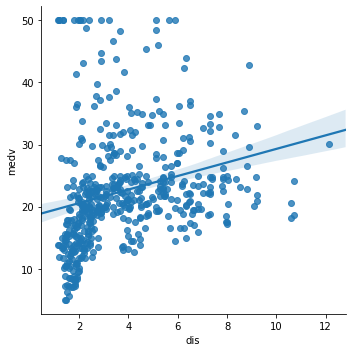

In [54]:
# lmplot of dis vs medv
sns.lmplot(x = 'dis',
           y = 'medv',
           data = boston_df) 

#### As the Weighted distances to five Boston employment centers(dis) increases, the Median value of owner-occupied homes in $1000s(medv) gradually increases

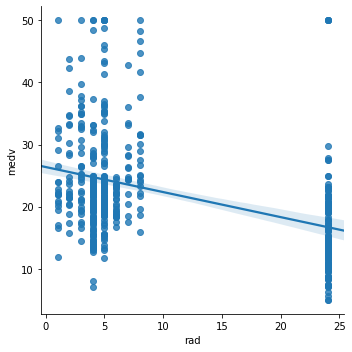

In [55]:
# lmplot of rad vs medv
sns.lmplot(x = 'rad',
           y = 'medv',
           data = boston_df) 

#### There seems to be no relationship between Index of accessibility to radial highways(rad and Median value of owner-occupied homes in $1000s(medv)

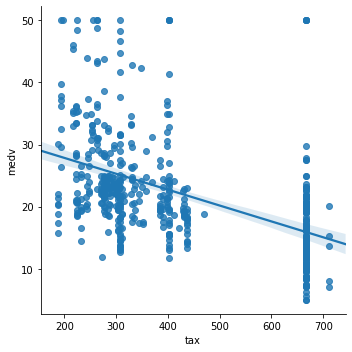

In [56]:
# lmplot of tax vs medv
sns.lmplot(x = 'tax',
           y = 'medv',
           data = boston_df) 

**As the Full-value property tax rate per 10,000(tax) increases,the Median value of owner-occupied homes in $1000s(medv)  decreases**

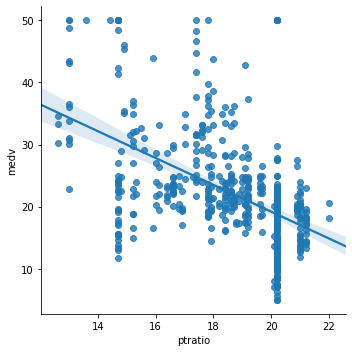

In [57]:
# lmplot of ptratio vs medv
sns.lmplot(x = 'ptratio',
           y = 'medv',
           data = boston_df) 

#### As the Pupil-teacher ratio by town(ptratio) increases, the Median value of owner-occupied homes in $1000s(medv) decreases

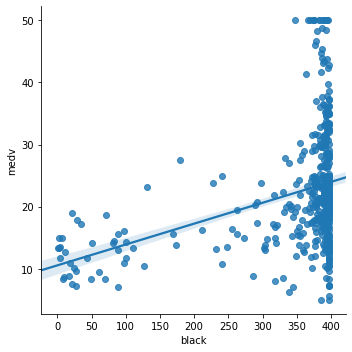

In [58]:
# lmplot of black vs medv
sns.lmplot(x = 'black',
           y = 'medv',
           data = boston_df) 

#### As the proportion of [people of African American descent] by town(black) increases, the Median value of owner-occupied homes in $1000s(medv) increases

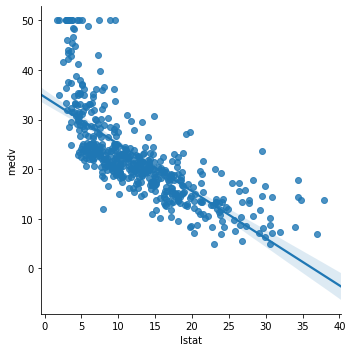

In [59]:
# lmplot of black vs medv
sns.lmplot(x = 'lstat',
           y = 'medv',
           data = boston_df) 

#### As the Percentage of lower status of the population(lstat) increases, the Median value of owner-occupied homes in $1000s(medv) decreases

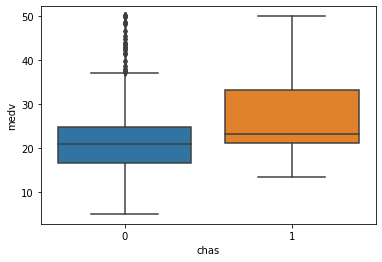

In [82]:
sns.boxplot(x = boston_df['chas'],y=boston_df['medv']);

#### The median of houses having tract bounds river(CHAS) is slightly higher the median of houses don not have tract bounds river

In [81]:
# Check correlation among independent variables using correlation matrix
cor = boston_df[["crim", "zn", "indus", "chas", "nox", "rm","age",\
                "dis", "rad", "tax", "ptratio", "black", "lstat" ]].corr()
cor

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


### d.	View the heatmap of the correlation matrix

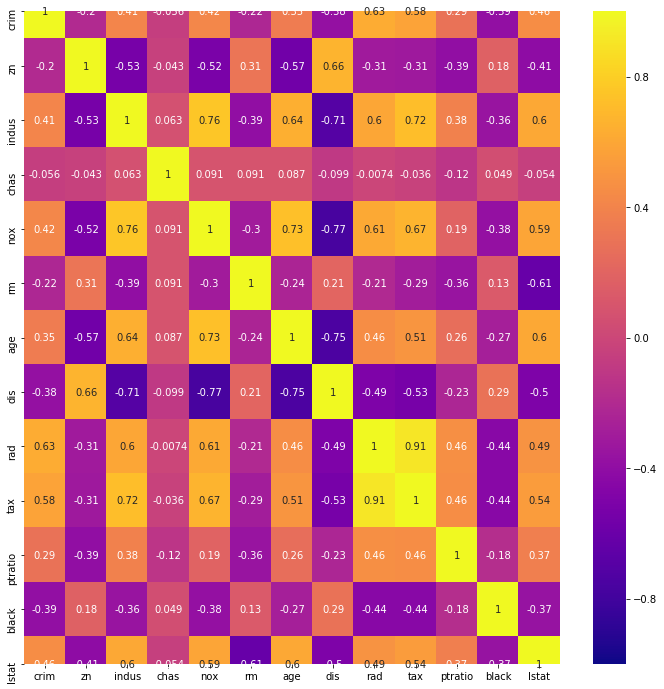

In [62]:
# View heat map of the correlation matrix
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cor, vmin = -1, vmax = 1, cmap = 'plasma', annot = True);

In [63]:
c = cor.abs()

# Unstack the correlation matrix
s = c.unstack()

#Filter to exclude values of 1
s = s[s != 1]

# Sort descending to find the highly correlated variables
so = s.sort_values(kind="quicksort", ascending=False)[:10]
so

rad    tax      0.910228
tax    rad      0.910228
dis    nox      0.769230
nox    dis      0.769230
indus  nox      0.763651
nox    indus    0.763651
dis    age      0.747881
age    dis      0.747881
nox    age      0.731470
age    nox      0.731470
dtype: float64

#### Strong correlation is seen between few independent variables: rad and tax, dis and nox, nox and indus, dis and age, age and nox. We also see many moderate correlation pairs.

In [64]:
# Collect independent variables as X and dependent variable as Y
X  = boston_df[["crim", "zn", "indus", "chas", "nox", "rm","age",\
                "dis", "rad", "tax", "ptratio", "black", "lstat" ]]
y  = boston_df["medv"]

In [65]:
# Add an intercept to X for our model
X  = sm.add_constant(X)

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [66]:
# Create the linear regression model based on OLS method
pricemodel = sm.OLS(y, X).fit() ## OLS(output, input)

In [67]:
# View the model summary
pricemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 23 Dec 2020   Prob (F-statistic):          6.72e-135
Time:                        12:29:16   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### In the main table, p value of F-stat, 6.72e-135, is well below our level of significance 0.05. So, the overall model is statistically significant and valid for estimating the population Y variable.
#### Adjusted R-Squared value of 73.4% indicates good explanatory power of the independent variables for changes in Y variable

In [68]:
# View the co-efficients only
pricemodel.params

const      36.459488
crim       -0.108011
zn          0.046420
indus       0.020559
chas        2.686734
nox       -17.766611
rm          3.809865
age         0.000692
dis        -1.475567
rad         0.306049
tax        -0.012335
ptratio    -0.952747
black       0.009312
lstat      -0.524758
dtype: float64

In [69]:
# Display the co-efficients and p values for each independent variable
reg_coeff = pd.DataFrame(pricemodel.params, columns = ['coef'])
reg_coeff['pvalue'] = pricemodel.pvalues
reg_coeff

,coef,pvalue
const,36.459488,3.283438e-12
crim,-0.108011,1.086810e-03
zn,0.046420,7.781097e-04
indus,0.020559,7.382881e-01
chas,2.686734,1.925030e-03
nox,-17.766611,4.245644e-06
rm,3.809865,1.979441e-18
age,0.000692,9.582293e-01
dis,-1.475567,6.013491e-13
rad,0.306049,5.070529e-06


#### The Y-intercept or constant value is 36.459

#### Regression coefficients: crim, zn, chas, nox, rm, dis, rad, tax, ptratio, black and Istat are statistically signifcant. These variables do have a significant impact on the population house price.
#### indus and age are not significant as their p values are above 0.05 (level of significance). We can conclude that these two variables do not have a linear relationship with the population house price.

In [70]:
# Predict dependent variable using the created model
predictions = pricemodel.predict(X)
predictions[1:10]

1    25.025562
2    30.567597
3    28.607036
4    27.943524
5    25.256284
6    23.001808
7    19.535988
8    11.523637
9    18.920262
dtype: float64

#### Predicted house prices for the first 10 records

In [71]:
# Create the linear regression model based using sklearn library
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [72]:
# The R-square of the model
lm.score(X,y)

0.7406426641094094

####  R-Squared value of 74% indicates good explanatory power of the independent variables for changes in Y variable

In [73]:
# Coefficients of the created model
lm.coef_

array([ 0.00000000e+00, -1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
        2.68673382e+00, -1.77666112e+01,  3.80986521e+00,  6.92224640e-04,
       -1.47556685e+00,  3.06049479e-01, -1.23345939e-02, -9.52747232e-01,
        9.31168327e-03, -5.24758378e-01])

In [74]:
# Intercept for the created model
lm.intercept_

36.45948838508974

#### The Y-intercept or constant value is 36.459

### Predict the dependent variable, house price, using the model

In [75]:
# Predict dependent variable using the created model
predictions = lm.predict(X)
print(predictions[0:5]) # First five housing prices

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423]


#### Predicted house prices for the first 5 records

In [76]:
# Import packages for model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [77]:
# Calculate MAE value for model evaluation
mae = mean_absolute_error(y,predictions)
print(np.round(mae,3))

3.271


In [78]:
# Calculate RMSE
mse = mean_squared_error(y,predictions)
rmse = np.sqrt(mse)
print(np.round(mse,3))
print(np.round(rmse,3))

21.895
4.679


In [79]:
# Calculate MAPE
actual = y
abs_error = np.abs(actual - predictions)
mape = np.round(np.mean(abs_error/actual),4)*100
mape

16.42

#### MAE is 3.271, RMSE is 4.679. 
#### MAPE value of 16.42 indicates moderate prediction accuracy of the model